In [130]:
import torch
import torch.nn as nn
loss_fn = nn.CrossEntropyLoss()
# 方便理解，此处假设batch_size = 1
x_input = torch.randn(2, 3)   # 预测2个对象，每个对象分别属于三个类别分别的概率
print(x_input.dtype)
x_input = torch.FloatTensor([[1,0,0],[0,0,1]])  #此处实际上是概率值
print(x_input.dtype)
print(x_input)

torch.float32
torch.float32
tensor([[1., 0., 0.],
        [0., 0., 1.]])


In [131]:
# 需要的GT格式为(2)的tensor,其中的值范围必须在0-2(0<value<C-1)之间。
x_target = torch.tensor([0, 2])  # 这里给出两个对象所属的类别标签即可，此处的意思为第一个对象属于第0类，第二个我对象属于第2类
print(x_target)

tensor([0, 2])


In [132]:
loss = loss_fn(x_input, x_target)
print('loss:\n', loss)

loss:
 tensor(0.5514)


## 计算原理：
### 1. 对每个batch中各数据的loss求了平均
### 2. loss = −x[class]+log(∑j exp(x[j]) ), 其中x为各类别的预测概率数组，class为类别的索引
### 3. 例如：-0.7+log(e^0.7+e^0.15+e^0.15)

In [136]:
import numpy as np
sss = np.e**1+np.e**0+np.e**0
loss = -1+np.log(sss)
loss

0.5514447139320509

In [134]:
sss = np.e
arr = []
for i in range(1,11):
    print(i,end = " ")
    print(np.log(sss)-1)
    arr.append(-1+np.log(sss))
    sss += 1 

1 0.0
2 0.3132616875182228
3 0.5514447139320509
4 0.743668380628679
5 0.904832441554448
6 1.0435917781858577
7 1.1654221804855953
8 1.2740088362278477
9 1.3719508656009087
10 1.4611501717344746


## 交叉熵损失函数的 最小类别数-最小loss 曲线：

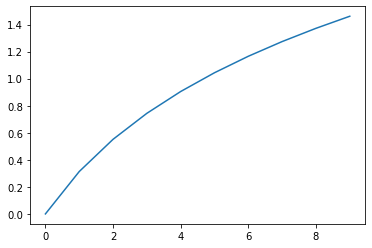

In [135]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(arr)